In [1]:
# Завантаження необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Завантаження файлу

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


Розпакування ZIP-архіву

In [3]:
import zipfile
import os

zip_path = "archive.zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Файли розпаковані в:", extract_path)


Файли розпаковані в: /content/data


Перегляд вмісту розпакованої папки

In [4]:
os.listdir(extract_path)


['internet_service_churn.csv']

In [5]:
df = pd.read_csv(next(iter(uploaded)))

In [6]:
# Перегляд перших рядків
print("Перші 5 рядків датасету:")
display(df.head())

Перші 5 рядків датасету:


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [7]:
# Загальна інформація про набір даних
print("\nІнформація про датасет:")
df.info()


Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [8]:
# Опис статистичних характеристик
print("\nОпис статистичних характеристик:")
display(df.describe())


Опис статистичних характеристик:


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [9]:
# Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
display(df.isnull().sum())


Кількість пропущених значень у кожному стовпці:


,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


In [10]:
# Візуалізація розподілів числових змінних
num_columns = df.select_dtypes(include=['number']).columns

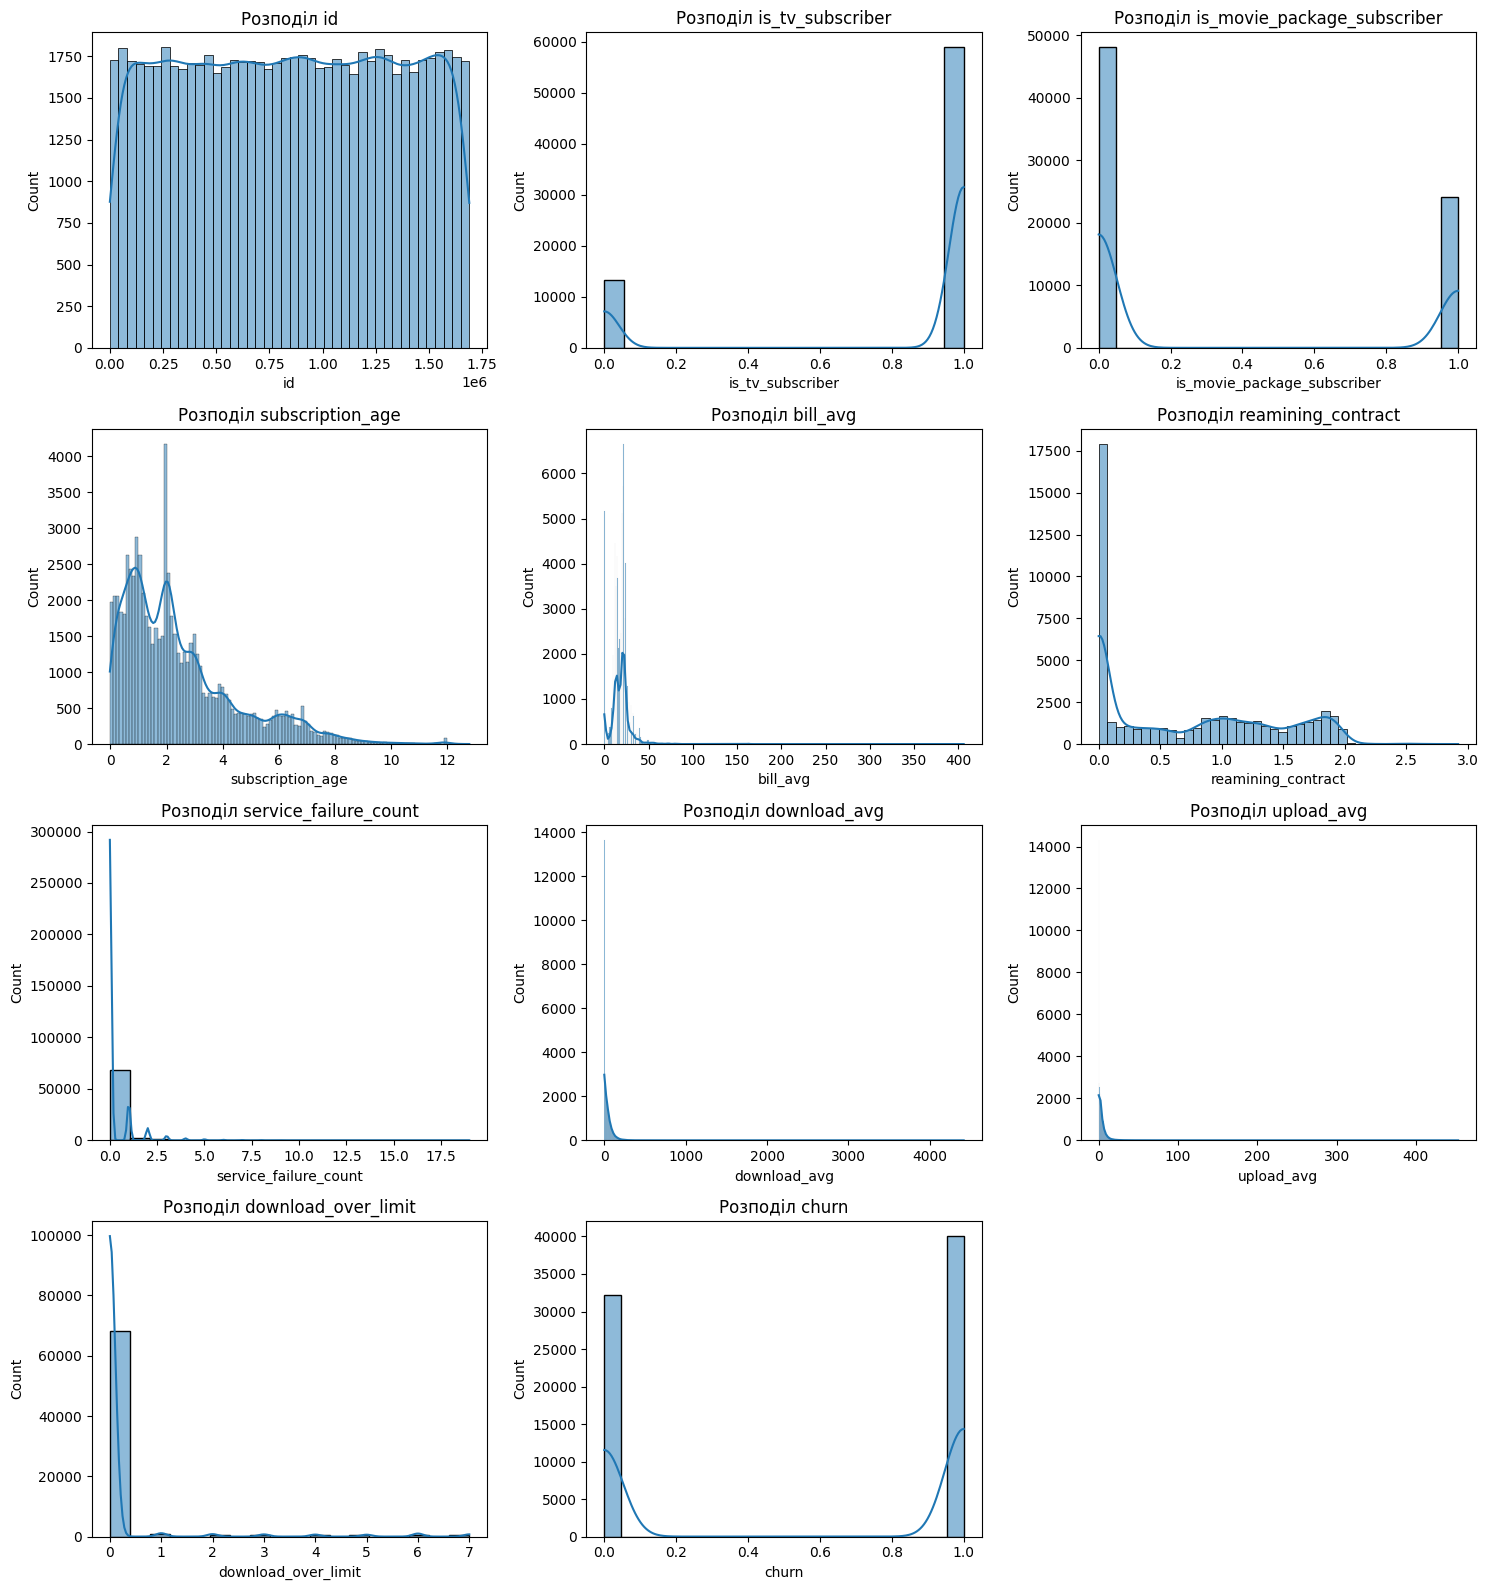

In [11]:
import math

# Кількість числових колонок
num_features = len(num_columns)

# Визначаємо кількість рядків і стовпців для підграфіків
rows = math.ceil(num_features / 3)  # Динамічно визначаємо кількість рядків
cols = min(3, num_features)  # Не більше 3 стовпців

plt.figure(figsize=(cols * 5, rows * 4))  # Динамічний розмір фігури

for i, col in enumerate(num_columns, 1):
    plt.subplot(rows, cols, i)  # Автоматично підлаштовуємо розмір
    sns.histplot(df[col], kde=True)
    plt.title(f'Розподіл {col}')

plt.tight_layout()
plt.show()


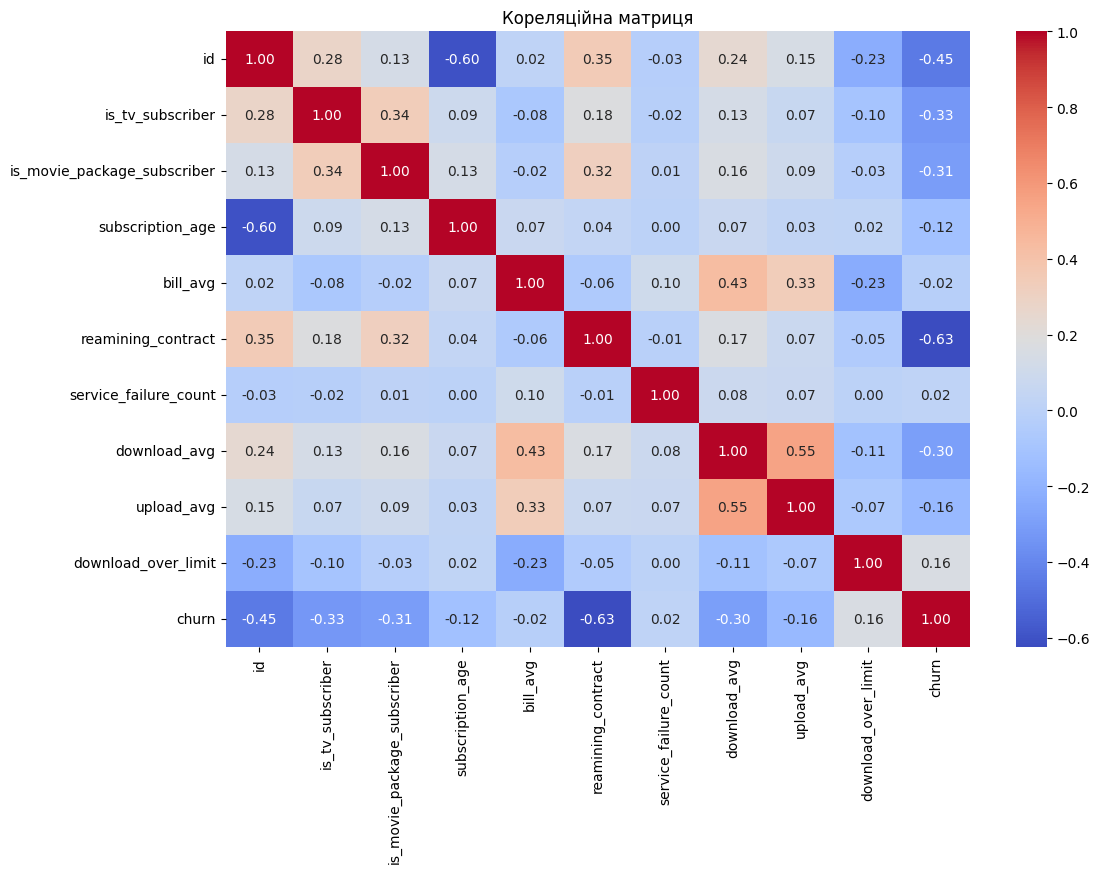

In [12]:
# Кореляційна матриця
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Кореляційна матриця")
plt.show()

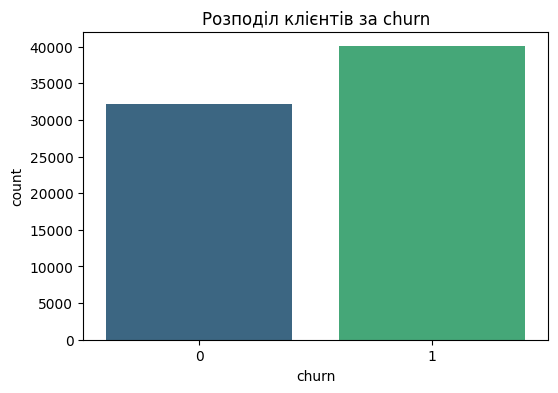

In [13]:
# Розподіл цільової змінної (churn)
if 'churn' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['churn'], hue=df['churn'], palette='viridis', legend=False)
    plt.title('Розподіл клієнтів за churn')
    plt.show()
else:
    print("\nКолонка 'churn' не знайдена в датасеті.")

Аналіз пропущених значень за допомогою missingno

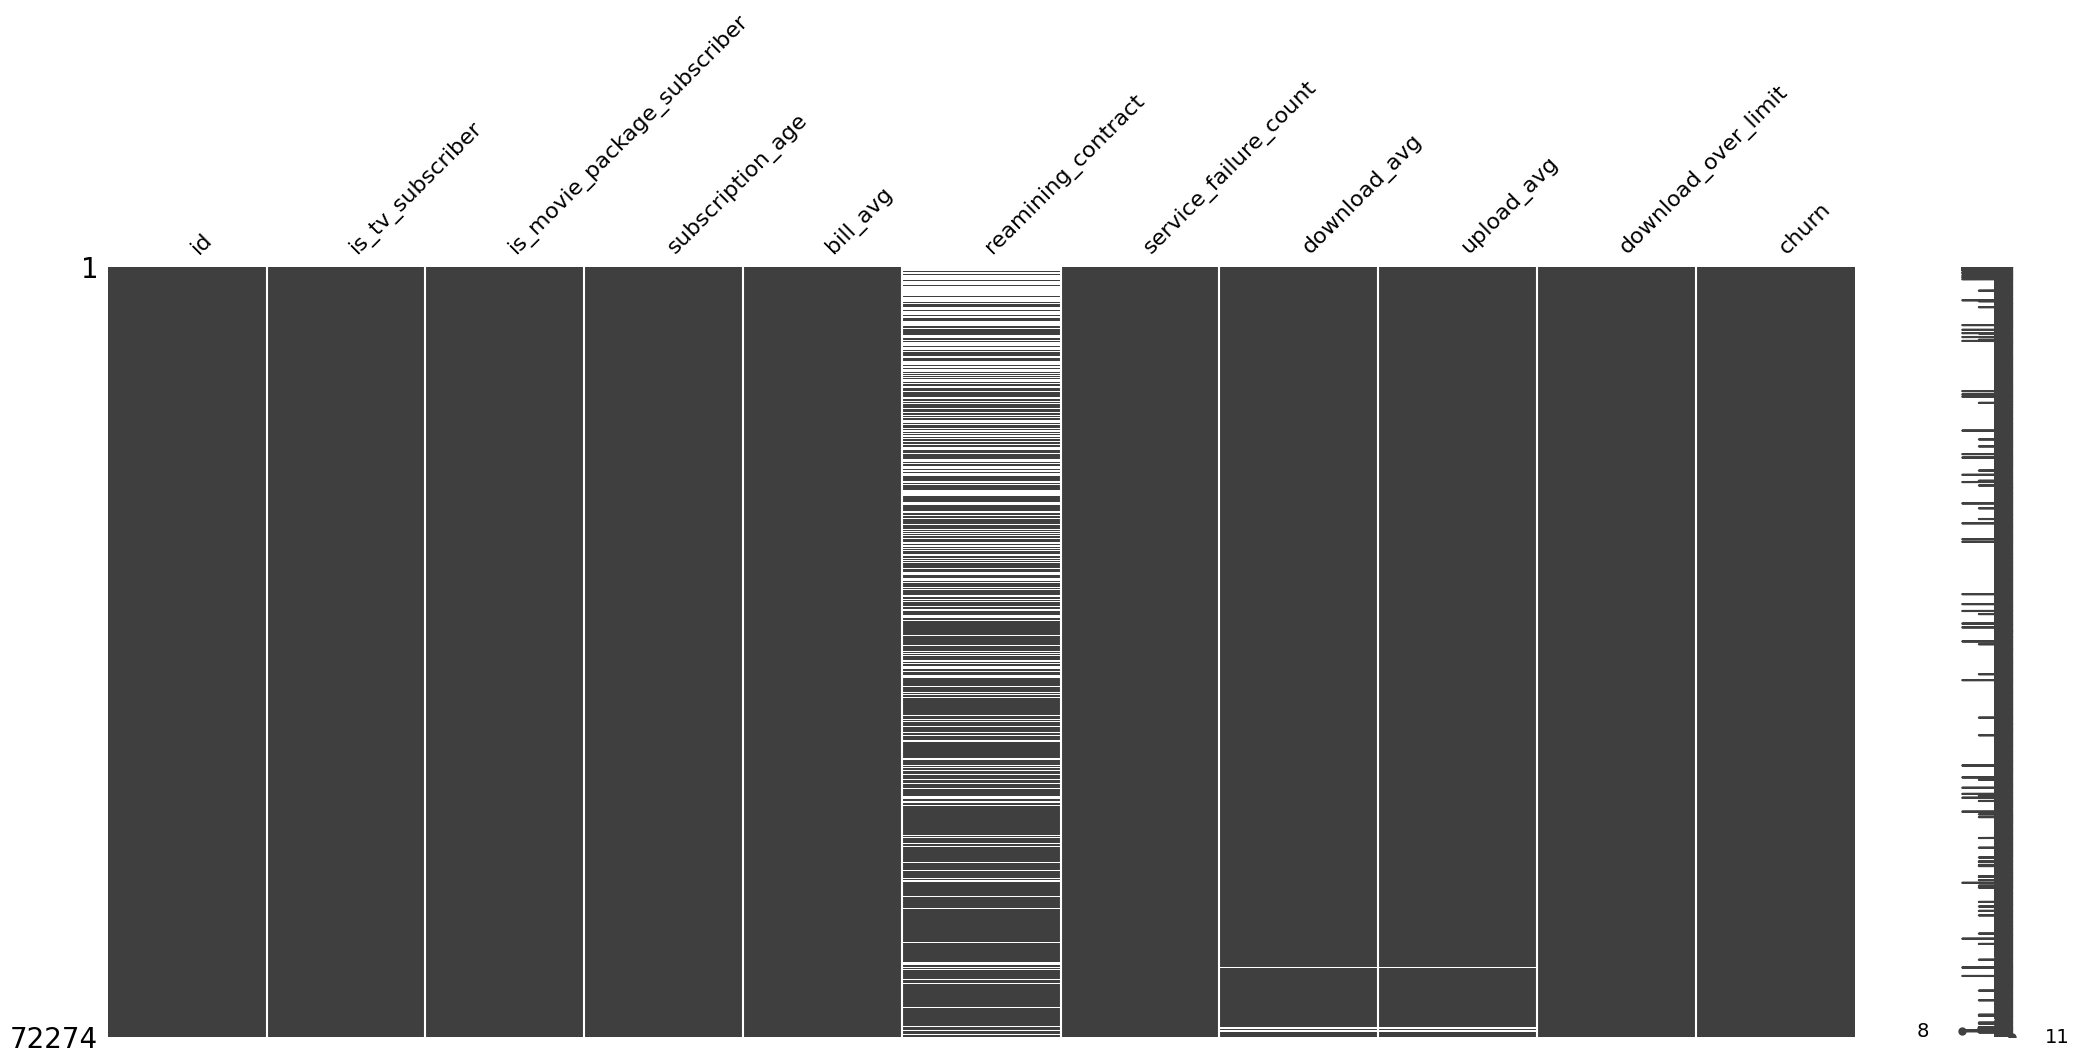

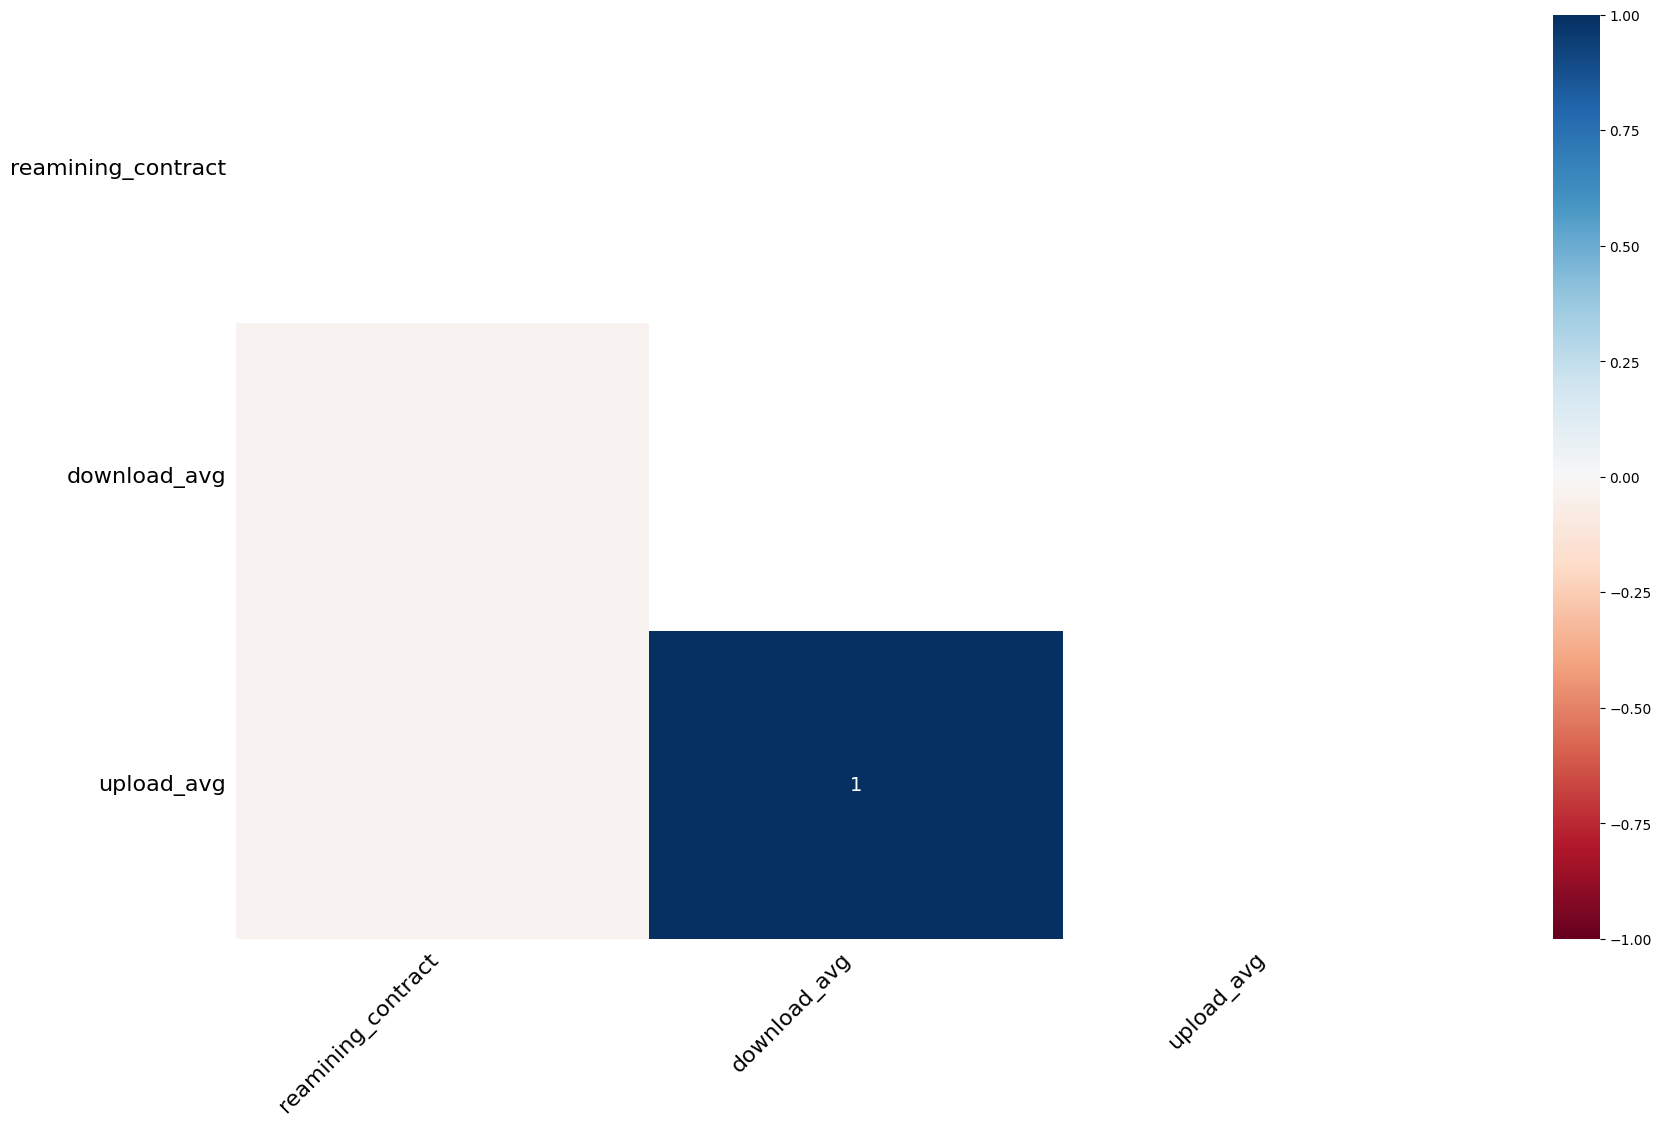

In [14]:
import missingno as msno
import matplotlib.pyplot as plt

# Візуалізація пропусків
msno.matrix(df)
plt.show()

# Теплова карта кореляції між пропусками
msno.heatmap(df)
plt.show()

Судячи з аналізу за методом missingno, відсутність значень у змінній reamining_contract залежить від id користувачів, так як id зростає, то й кількість пропусків стає поступово менше у користувачів.

Аналіз кореляції відсутніх значень з іншими змінними

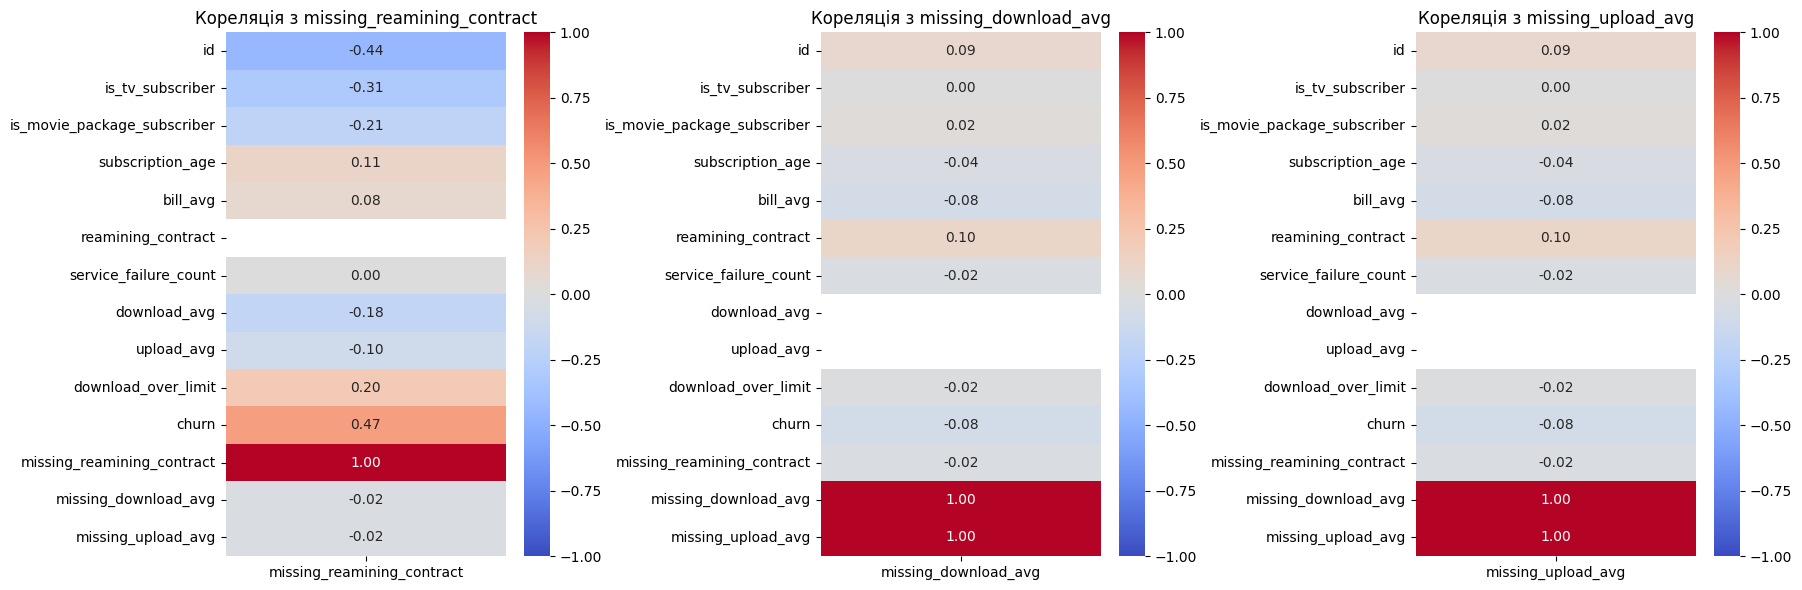

In [15]:
# Створюємо три матриці кореляції
df['missing_reamining_contract'] = df['reamining_contract'].isna().astype(int)
df['missing_download_avg'] = df['download_avg'].isna().astype(int)
df['missing_upload_avg'] = df['upload_avg'].isna().astype(int)

corr_reamining_contract = df.corr()[['missing_reamining_contract']]
corr_download_avg = df.corr()[['missing_download_avg']]
corr_upload_avg = df.corr()[['missing_upload_avg']]

# Створюємо три графіки в одному вікні
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Візуалізація кожної з матриць
sns.heatmap(corr_reamining_contract, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True, ax=axes[0])
axes[0].set_title('Кореляція з missing_reamining_contract')

sns.heatmap(corr_download_avg, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True, ax=axes[1])
axes[1].set_title('Кореляція з missing_download_avg')

sns.heatmap(corr_upload_avg, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True, ax=axes[2])
axes[2].set_title('Кореляція з missing_upload_avg')

# Покажемо графіки
plt.tight_layout()
plt.show()


Так, як змінна remaining_contract сильно корелює відсутніми значеннями зі змінною churn та з id, то, ймовірно це пов'язано з тим, що клієнти без контракту можуть швидше відмовлятися від послуг (churn), або ці значення могли бути заповнені лише для певних типів користувачів. Тому можливо варто заповнити ці пропущенні значення нулями.

Ситуація з download_avg та upload_avg інша. Тут нема сильних кореляцій між змінними, тому варто заповнити пропуски середніми значеннями

Дисбаланс класів у цільової змінної невеликий, тому поки що немає необхідності щось змінювати

Поверннемо початковий вигляд датасету

In [16]:
df = pd.read_csv(next(iter(uploaded)))

Значення -0.02 в subscription_age виглядає як аномалія, оскільки вік підписки не може бути від’ємним. Перевіримо ці рядки

In [17]:
df[df['subscription_age'] < 0]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
69320,1621523,0,0,-0.02,0,0.08,0,32.6,1.3,0,1


Так як таких випадків всього один - найпростіше видалити цей рядок, щоб не ускладнювати аналіз.

In [18]:
prep_df = df[df['subscription_age'] >= 0]
prep_df[df['subscription_age'] < 0]

<ipython-input-18-61ba19434388>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prep_df[df['subscription_age'] < 0]


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


Заповнимо відсутні значення

In [19]:

# замінимо відсутні значення у reamining_contract нулями
# так як значення у download_avg та upload_avg можуть бути аномально великими, краще замінити відсутні значення медіаною
prep_df = prep_df.assign(
    reamining_contract=prep_df['reamining_contract'].fillna(0),
    download_avg=prep_df['download_avg'].fillna(prep_df['download_avg'].median()),
    upload_avg=prep_df['upload_avg'].fillna(prep_df['upload_avg'].median())
)

display(prep_df.isnull().sum())

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


In [20]:
prep_df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227300e+04,72273.000000,72273.000000,72273.000000,72273.000000,72273.000000,72273.000000,72273.000000,72273.000000,72273.000000,72273.000000
mean,8.463075e+05,0.815270,0.334634,2.450085,18.942745,0.502325,0.274238,43.606298,4.181087,0.207616,0.554135
std,4.890971e+05,0.388081,0.471866,2.034983,13.215290,0.669527,0.816626,63.249506,9.794215,0.997130,0.497064
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222160e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.800000,0.500000,0.000000,0.000000
50%,8.477820e+05,1.000000,0.000000,1.980000,19.000000,0.000000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269553e+06,1.000000,1.000000,3.300000,22.000000,1.040000,0.000000,60.200000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


Судячи з аналізу кореляцій змінних, сильно корелюючих між собою незалежних змінних немає, проте є стовпець id, його варто видалити, так як це просто ідентифікатор клієнта, тому можемо залишити поки що усі стовпці, окрім id, а у майбутньому подивитися на feature importance.

In [21]:
prep_df = prep_df.drop('id', axis=1)
prep_df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1


Кодування категоріальних змінних непотрібно, так як у цільової змінної вже стоять бінарні значення (0, 1)

Створимо X та y вибірки

In [22]:
y = prep_df['churn']

X = prep_df.drop(columns=['churn'])
print(y[:5], "\n", X.head(5))

0    0
1    1
2    1
3    1
4    1
Name: churn, dtype: int64 
    is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
0                 1                            0             11.95        25   
1                 0                            0              8.22         0   
2                 1                            0              8.91        16   
3                 0                            0              6.87        21   
4                 0                            0              6.39         0   

   reamining_contract  service_failure_count  download_avg  upload_avg  \
0                0.14                      0           8.4         2.3   
1                0.00                      0           0.0         0.0   
2                0.00                      0          13.7         0.9   
3                0.00                      1           0.0         0.0   
4                0.00                      0           0.0         0.0   

   download

Розділимо датасет на тренувальну та тестову вибірки

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Використаємо стандартизацію даних, тому що змінні мають різні одиниці вимірювання

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

До тренування датасет готовий. Змінні, які треба використовувати для тренування моделі:

*   X_train_scaled - набір ознак для тренування
*   X_test_scaled - набір ознак для тесту
*   y_train - тренувальна цільова змінна
*   y_test - тестова цільова змінна